# Entanglement and Unitary Quantum Speed limits


### David Galvin, Special Topics - 02/02/2022


#### Background:
<b>The following details presented from a topical review <i>Quantum speed limits: from Heisenberg’s 
uncertainty principle to optimal quantum 
    control</i> by S. Deffner and S. Campbell </b>
https://iopscience.iop.org/article/10.1088/1751-8121/aa86c6 
    

<b>The product of the "uncertainties" of energy and time $\Delta E \Delta t \gtrsim \hbar$ is seen commonly in Physics literature. Generally heuristic justifications for this relationship are given, exploiting the fact that position and momentum are canonical conjugates, but the meaning of $\Delta t$ is left vague. The main problem is that $\Delta \hat{A}$ is defined on operator observables, which time is not. The interpretation issue is compounded further by the more precise meaning of the uncertainty principle, that is as the product of the deviations on ensembles of equal systems rather than that of simultaneous measurement.
   
Soviet Physicists Leonid Mandelstam and Igor Tamm gave a more concrete interpretation of the relationship, associating $\Delta t$ with an intrinsic timescale for unitary quantum evolution. Using the von Neumann equation and Cauchy-Schwarz inequality:</b>
    

$$\frac{d}{dt} \hat{A} = -\frac{1}{i\hbar}[\hat{H},\hat{A}] \, \, {\rm ,  } \, \Delta \hat{H} \Delta \hat{A} \geq |\langle \frac{d\hat{A}}{dt}\rangle|$$

<b>One gets for $\hat{A} = |\phi_0 \rangle \langle \phi_0 |$ a projector on an initial state, 
    
$$\Delta \hat{H} t \geq \frac{\pi\hbar}{2}-\sin^{-1}\sqrt{\langle\hat{A}\rangle}_t$$
    
If the final state is orthogonal then the minimum time for this evolution is determined by 
    
$$\tau \geq \frac{pi}{2}\frac{\hbar}{\Delta \hat{H}}=:\tau_{QSL}$$

Here $\tau_{QSL}$ is a lower bound on the time of the system's evolution to an orthogonal state</b> 
    
    

<b>Another bound for this speed was given by Margolus and Levitin:

Given a pure state expressed in the energy eigenbasis
    
    
$$|\phi\rangle = \sum_n c_n |E_n \rangle$$

The overlap of the time evolved state with the initial state:

$$S(t):=\sum_n |c_n|^2 {\rm exp}(-i E_nt\hbar)$$

Taking the real part a bound is obtained:

$$\sum_n |c_n|^2 \cos(E_n t/\hbar) \geq \sum_n|c_n|^2[1-\frac{2}{\pi}(E_n t /\hbar + \sin(E_n t/ \hbar))] \geq 1-\frac{2}{\pi}\frac{\langle \hat{H}\rangle}{\hbar}+\frac{2}{\pi}\mathcal{I}(S)$$
    

Where $\langle \hat{H} \rangle \geq 0$. When the evolved state is orthogonal to the initial state this bound becomes 
    
$$\tau \geq \frac{pi}{2}\frac{\hbar}{\langle \hat{H} \rangle}=:\tau_{QSL} $$
    
</b>

<b>Thus two bounds are presented based on two different properties of the Hamiltonian. It has been established that the bound

$$\tau_{QSL} = \max\left[\frac{\pi}{2}\frac{\hbar}{\Delta {H}}, \frac{\pi}{2}\frac{\hbar}{\langle {H} \rangle}\right]$$

is tight in the sense $\exists \, |\psi\rangle$ for which the bound is reached simultaneously.

### Fidelity and Entanglement

<b>Given the above, what can we say about the effect of entanglement on quantum speed limits, if any? To this end we will perform a numerical survey as outlined in the paper</b> (arXiv:quant-ph/0608249)

<b>The particular case that will be surveyed here will be the evolution of a two-system pure state under a Hamiltonian $H$ with units of energy such that

$$H=\begin{pmatrix} 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 
                    \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 2\end{pmatrix}$$
    
where $H$ is presented in the computational basis $|i\rangle|j\rangle$ for $i,j \in \{0, 1\}$    
</b>



In [7]:
import numpy as np
import matplotlib.pyplot as plt

H=np.array([[0,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,2]])
print(H)




[[0 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 2]]


<b>The <i>fidelity</i> $F(\rho,\sigma)$ of two states (density matrices) is a measurement of an "angle" between them and in the case of pure states $|\phi\rangle$, $|\psi \rangle$ is simply
    
$$F(\rho, \sigma)={\rm tr}(\rho \sigma)=|\langle \phi|\psi\rangle|^2$$
    
During this survey we wish to measure how entangled states are affected during unitary evolution. The measure of entanglement to be used is that of <i>concurrence</i> defined as 
    
$$C^2 := 4\det{\rho_{A,B}}$$
    
where $\rho_{A,B}$ are the reduced one qubit subsystems of our two qubit system. In particular we will examine how the concurrence relates to a state's relative time to evolution $\tau = t / \tau_{QSL}$ for some local minimum of the Fidelity

One of the cases that we will examine is the relative time it takes for a state to evolve to an orthogonal one. Before beginning on simulation and numerics it is worth noting that this paper provides an analytic means of sampling from such states.
    
Let
    
$$|\psi\rangle = c_{00}|00\rangle+c_{01}|01\rangle+c_{10}|10\rangle+c_{11}|11\rangle$$

Then a parameterisation for sampling from states that evolve to an orthogonal one under this Hamiltonian is

$\delta \sim U(0,1)$, $\Omega \sim U(\pi/2,\pi)$
    
Calculate $\Gamma=1/[2(1-\cos(\Omega)]$
    
Then $|c_{00}|^2=|c_{11}|^2=\Gamma$, $|c_{01}|^2 = -2\delta\Gamma\cos(\Omega)$, $|c_{10}|^2=-2(1-\delta)\Gamma\cos(\Omega)$
    
The numerical means of doing this is shown below:

In [14]:
import numpy.random as rnd
import matplotlib.pyplot as plt

# Providing an analytic sample of states who evolve to 0 Fidelity

# Sample size
N_analytic_samples=10000

# Random variables
Omega = np.pi/2+(np.pi/2*rnd.random((N_analytic_samples,1)))
delta = rnd.random((N_analytic_samples,1))
Gamma = 1/(2*(1-np.cos(Omega)))

# Sampling the imaginary parts of the parameterisation, from a [0,2pi)^4 box
c0=np.sqrt(Gamma)*np.exp(1j*np.pi*2*rnd.random((N_analytic_samples,1)))
c3=c0*np.exp(np.pi/2*1j)*np.exp(1j*np.pi*2*rnd.random((N_analytic_samples,1)))

c1 = np.sqrt(-2*delta*Gamma*np.cos(Omega))*np.exp(1j*np.pi*2*rnd.random((N_analytic_samples,1)))
c2 = np.sqrt(-2*(1-delta)*Gamma*np.cos(Omega))*np.exp(1j*np.pi*2*rnd.random((N_analytic_samples,1)))


C = 2*np.abs(c0*c3-c1*c2)

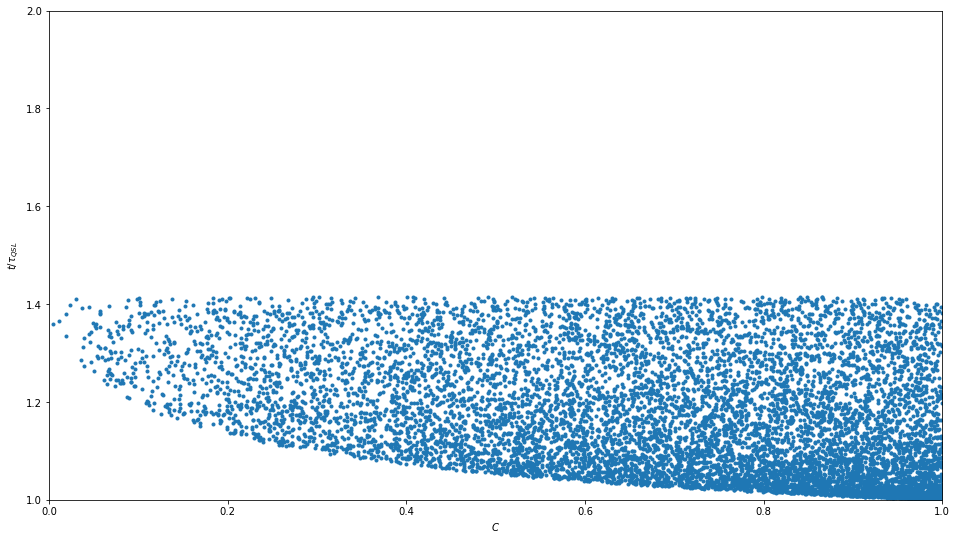

In [17]:

# Define functions for calculating expected value and std dev of H
# For calculation of tau_qsl
def Exp_analytic(A, rho):
    return np.trace(A@rho)

def Fluct_analytic(A, rho):
    return np.sqrt(Exp_analytic(A@A, rho)-(Exp_analytic(A, rho))**2)

an_states = [np.matrix([[c0[j].item(0)], [c1[j].item(0)], [c2[j].item(0)], [c3[j].item(0)]]) for j in range(0,len(c0))]

rho_states=[an_states[j]@an_states[j].H for j in range(0,len(an_states))]

# Calculate the tau_qsl for each state
divisors=[[(np.pi/2)*(np.maximum(1/Exp_analytic(H, rho_states[j]), 1/Fluct_analytic(H, rho_states[j])))] for j in range(0,N_analytic_samples)]

# calculate the time relative to the tau_qsl
nuOmega=Omega/divisors

plt.figure(figsize=(16,9))
plt.scatter(C,nuOmega,marker='.')
plt.xlim([0,1])
plt.ylim([1,2])
plt.ylabel(r'$t/\tau_{QSL}$')
plt.xlabel('$C$')
plt.show()


### Examining the result

<b>Observe for large values of C there is a far greater density with a relative evolution time close to $1$, that is, these highly entangled states are very close to evolving to an orthogonal state in the minimum possible time $\tau_{QSL}$. Conversely, as $C \to 0$ states appear to evolve much more slowly than the theoretical quantum speed limit with an observable bound on their relative time. Also observe that all states evolve to an orthogonal one within a time that is $\sqrt{2} \simeq 1.414$ times the minimum time</b>


### Toward numerics

<b>While the analytic result above is nice, the method is very specific and not sufficientally general. To this end we look to develop a means of simulating the relative time evolution of pure quantum states.
    
As a start we must take care that our sampling is sufficientally uniform so that we get a meaningful representation of states. Every density matrix $\rho$ can be diagonalised as $U\Sigma U^\dagger$ for some $U$ unitary, $\Sigma$ diagonal. To sample uniformly from $U$ we must the appropriate measure. The special unitary group $SU(4)$ admits requires use of the Haar measure for uniform samples over its volume. A method for sampling using $QR$ decomposition is detailed here https://pennylane.ai/qml/demos/tutorial_haar_measure.html 

In [19]:
# Generate a Haar random unitary, taken from https://pennylane.ai/qml/demos/tutorial_haar_measure.html
from numpy.linalg import qr
def qr_haar(N):
    """Generate a Haar-random matrix using the QR decomposition."""
    # Step 1
    A, B = np.random.normal(size=(N, N)), np.random.normal(size=(N, N))
    Z = A + 1j * B

    # Step 2
    Q, R = qr(Z)

    # Step 3
    Lambda = np.diag([R[i, i] / np.abs(R[i, i]) for i in range(N)])

    # Step 4
    return np.dot(Q, Lambda)

<b>One of the advantages provided by numpy is that some methods are equipped with parallelisation,
allowing you to take advantage of a speed-up in computation by calculating on batches of samples.

Thus functions will be defined to take inputs of arrays of density matrices etc.

For example we will compute the fidelity on a number of samples in batches 
</b>

In [21]:
def GetFidelity(rho, sigma):
    '''Get the pointwise fidelities of two batches of states'''
    return np.trace(np.matmul(rho, sigma), axis1=1, axis2=2)

### The scheme

<b>The plan is to

* Uniformly sample pure states
* Evolve these samples, calculating the fidelity with the original state at each step
* Take note of the first local minimum of the fidelity, and the time at which it occurs
* Explore the time it takes to reach this minimum under the above Hamiltonian, relative to the theoretical minimum

Note that in the fourth step we are observing cases where the first minimum of the Fidelity may not (and will often not) be 0 and so the minimum time of evolution is not as simple as the case of orthogonal states detailed above. Indeed the papers above specify the minimum time in this case as:

$$\tau_{QSL}(F) = \max\left[\beta(F)\frac{\pi}{2}\frac{\hbar}{\Delta {H}}, \alpha(F)\frac{\pi}{2}\frac{\hbar}{\langle {H} \rangle}\right]$$

where $\beta(F) = (2/\pi)\cos^{-1}(\sqrt{F})$ and it has been shown numerically that $\alpha(F) \simeq \beta(F)^2$
    
Thus we define helper functions to calculate these quantities:
    
</b>

In [23]:
def BetaF(F):
    return (2/np.pi)*np.arccos(np.sqrt(F))

def AlphaF(F):
    return np.square(BetaF(F))

# Calculate the denominators for the tau_QSL
def Expectation(A, rho_batch):
    # Extend A to an array of the same size for parallelisation
    Avec=np.full(rho_batch.shape, A)
    return np.trace(np.matmul(Avec, rho_batch), axis1=1, axis2=2)

def Fluctuation(A, rho_batch):
    
    ExpA2=Expectation(A@A, rho_batch)
    ExpA=Expectation(A, rho_batch)
    
    delta=ExpA2-(np.square(ExpA))
    
    return np.sqrt(delta)

<b>Thus we can compute $\tau_{QSL}$ given a batched set of fidelity values and density matrices</b>

In [24]:
def GetTQSL(fmins, rho_batch, ret_bounds=False):
    
    expects=Expectation(H, rho_batch)
    flucts=Fluctuation(H, rho_batch)
    
    alphas=AlphaF(fmins)
    betas=BetaF(fmins)
    
    bounds1=np.pi/2*np.multiply(alphas, 1/expects)
    bounds2=np.pi/2*np.multiply(betas, 1/flucts)
    
    
    bound = np.maximum(bounds1, bounds2)
    
    if (ret_bounds):
        return bound, bounds1, bounds2
    else:
        return bound

<b>This particular procedure observes the evolution of the fidelity, so we define a function to sample the fidelity function for each of our states</b>

In [31]:
from scipy.linalg import expm
def EvolveFidelity(rho_batch_0, H, T=10, n_timesteps=1000):
    
    timesteps, dt=np.linspace(0,T, n_timesteps, retstep=True)
    
    batch_size=rho_batch_0.shape[0]
    
    U=np.full(rho_batch_0.shape, expm(-1j*H*dt))
    UH=np.full(rho_batch_0.shape,expm(1j*H*dt))
    
    fidelities=np.zeros([batch_size, n_timesteps])
    
    rho=rho_batch_0
    for idx, t in enumerate(timesteps):
        rho_new=np.matmul(np.matmul(U, rho), UH)
        rho=rho_new
        fidelities[:,idx]=GetFidelity(rho, rho_batch_0)
        
    
    return fidelities, timesteps

<b>We will be interested in the measure of entanglement upon the subsystems. With the concurrence measure we are not particular interested in which particular subsystem we define the partial trace as that which traces out the second subsystem.</b>

In [26]:
def PartialTrace(rho):
    
    rho_A = np.zeros((2,2), dtype='complex')
    rho_A[0,0]=rho[0,0]+rho[1,1]
    rho_A[0,1]=rho[0,2]+rho[1,3]
    rho_A[1,0]=rho[2,0]+rho[3,1]
    rho_A[1,1]=rho[2,2]+rho[3,3]
    
    return rho_A

# Find the concurrence of a 2x2 subsystem rho
from numpy.linalg import det
def Concurrence(rho_batch):
    return np.sqrt(4*det(rho_batch))

<b> Now we look at the components of our algorithm. As we are sampling pure states we sample a unitary $U$ and apply it to the basis state $|00\rangle \langle 00|$ due to the unitary equivalence between pure states</b>

In [27]:
def SampleStates(batch_size=5000, save=False, filename='rho_batch.npy'):
    
    # Set zero_density
    zerozero_vec=np.array([[1,0,0,0]]).T
    zerozero_density=zerozero_vec@(zerozero_vec.T)
    
    # Generate N_samples unitary matrices
    U_samples=np.array([qr_haar(4) for n in range(batch_size)])
    # Hermitian conjugate:
    UH_samples=np.array([U.T.conj() for U in U_samples])

    # Generate density samples
    zero_batch=np.full(U_samples.shape, zerozero_density)
    rho_batch=np.matmul(np.matmul(U_samples, zero_batch), UH_samples)
    
    if (save==True):
        np.save(filename, rho_batch)
    
    return rho_batch

<b>We now define subroutines for our algorithm. GetLocalMins will take the fidelities sampled from our evolution and return a detailed analysis of the first local minimum including time at which it occurred and index in our discretised time array.

FindSampleMins will do the overall work of finding the fidelity with timesteps, call GetLocalMins and find the output of the sample.</b>

In [28]:
def GetConcurrences(rho_batch):
    A_batch = np.array([PartialTrace(rho) for rho in rho_batch])
    concurrences = Concurrence(A_batch)
    return concurrences

def GetLocalMins(fidelities, timesteps):
    df=np.diff(fidelities)
    df_cond= df>=0
    
    min_indices=np.array([np.where(df_b)[0][0] for df_b in df_cond])
    
    fmins=np.zeros(fidelities.shape[0])
    tmins=np.zeros(fidelities.shape[0])
    for idx, min_idx in enumerate(min_indices):
        fmins[idx]=fidelities[idx][min_idx]
        tmins[idx]=timesteps[min_idx]
    return fmins, tmins, min_indices

def FindSampleMins(rho_batch, H, T_evolve=10, evolution_timesteps=1000, save=False, filename='fidel.npy'):
    # Simulate evolution
    fidelities, timesteps = EvolveFidelity(rho_batch, H, T=T_evolve, n_timesteps=evolution_timesteps)
    
    # Sample first local minimum, time to reach it and its index
    fmins, tmins, min_indices=GetLocalMins(fidelities, timesteps)    
    if (save==True):
        np.save(filename, np.array([fmins, tmins, min_indices, timesteps]))
    
    return fmins, tmins, min_indices, timesteps


<b> We can now get to work on the numerical task. We define an overarching procedure that will take care of much of the detail.

* This procedure takes as input the Hamiltonian of interest, as well as the number of samples we want to take.
* Moreover the procedure allows us to specify that we would like to take many batches in sequence, combining parallelisation
    and sequential computation to maximise our total sample
    
There are three figures of interest:
* The totality of our samples, plotted as concurrence vs relative time
* Those samples where the fidelity evolved close to zero (almost orthonormal), taken as the bottom 1% of collected local minima
* Samples within a range min_a, min_b specified at input time
    
Upon simulation it is found that most of the data is 'pathological'. In particular those states which evolve the slowest with a time $t=\pi$ exhibit behaviour distinct from the rest of the data. In order to better discover the patterns the slowest evolving states are pruned from consideration so that all data presented in the bottom two plots correspond to the case $t < \pi$
    
</b>

In [41]:
def Procedure(H, batch_size=5000, batches=1, min_a=0.35, min_b=0.4):
    
    # Create figures
    fig_total=plt.figure(figsize=(8,8))
    fig_ortho=plt.figure(figsize=(8,8))
    fig_range=plt.figure(figsize=(8,8))
    
    ax0=fig_total.add_axes([0.1, 0.1, 0.8, 0.8])
    ax0.set_xlim(0,1)
    ax0.set_ylim(1,2)
    
    # Set paramaters of orthonormal states
    ax1=fig_ortho.add_axes([0.1, 0.1, 0.8, 0.8])
    ax1.set_xlim(0,1)
    ax1.set_ylim(1,2)
    
    # Set parameters for graph for range of fmins
    ax2=fig_range.add_axes([0.1, 0.1, 0.8, 0.8])
    ax2.set_xlim(0,1)
    ax2.set_ylim(1,2)
    
    # For reproducability
    np.random.seed(451)
    
    for i in range(batches):
        rho_batch=SampleStates(batch_size)
        C2=GetConcurrences(rho_batch)
        fmins, tmins, min_indices, timesteps=FindSampleMins(rho_batch, H)
        tlowers=GetTQSL(fmins, rho_batch)
        taus=tmins/tlowers
        
        ax0.scatter(C2, taus, s=2, c='b')
        
        # Take the samples whose fidelity is in the bottom 1%, almost orthogonal
        ortho_tol=np.quantile(fmins,0.01)
        # Prune the slowest evolving states
        ortho_idx=np.where(np.logical_and(fmins < ortho_tol, tmins != np.max(tmins)))
        ax1.scatter(C2[ortho_idx], taus[ortho_idx],s=2,c='b')
        
        # Prune the slowest evolving states and observe behavior for fmin in (min_a,min_b)
        range_idx=np.where(np.logical_and(np.logical_and(fmins > min_a, fmins < min_b), tmins != np.max(tmins)))
        ax2.scatter(C2[range_idx], taus[range_idx],s=2,c='b')
    
    plt.show()
    return fig_ortho, fig_range, fig_total

<ipython-input-31-6bd16ac38c7a>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelities[:,idx]=GetFidelity(rho, rho_batch_0)


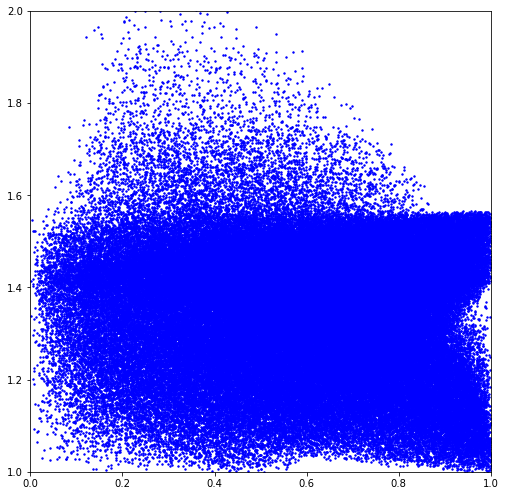

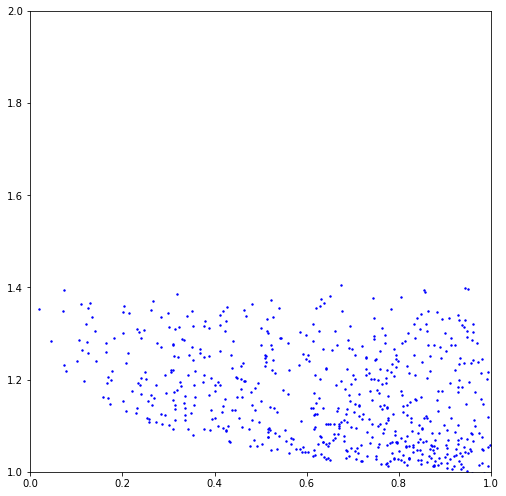

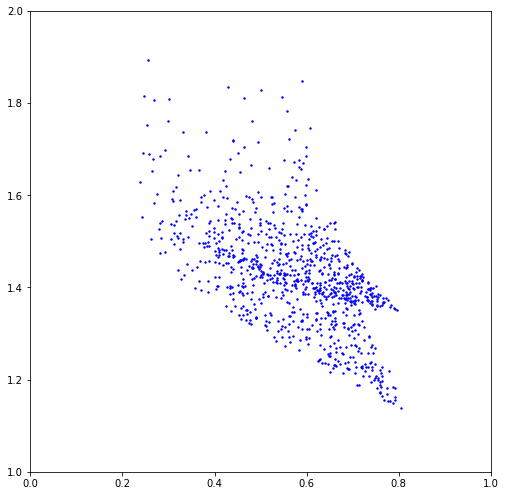

In [42]:
fig1, fig2, fig3 =Procedure(H,batch_size=5000,batches=30)

In [43]:
fig1.savefig('ortho_with5000x30samples.png')
fig2.savefig('min_35to40_with5000x30samples.png')
fig3.savefig('total_with5000x30samples.png')

<b>A sample of 30 batches of size 10000 produces these figures: </b>
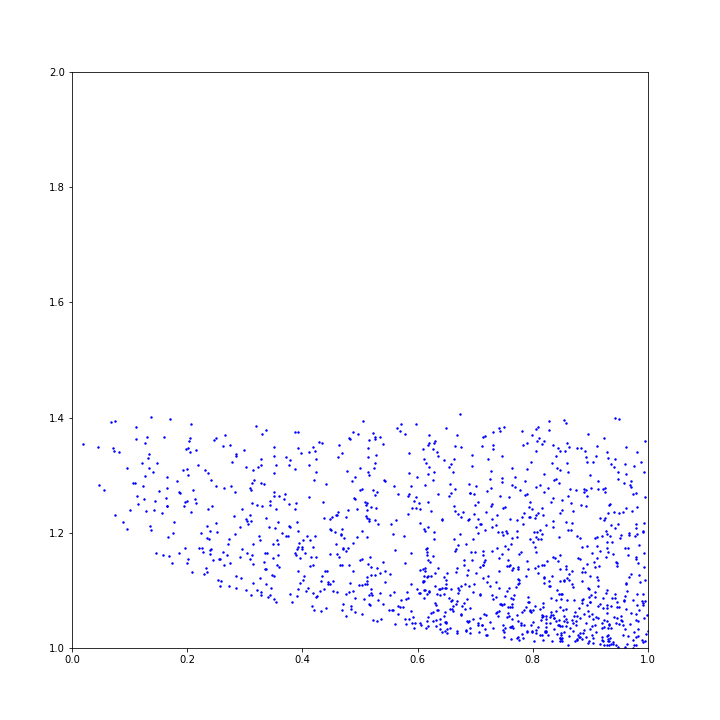

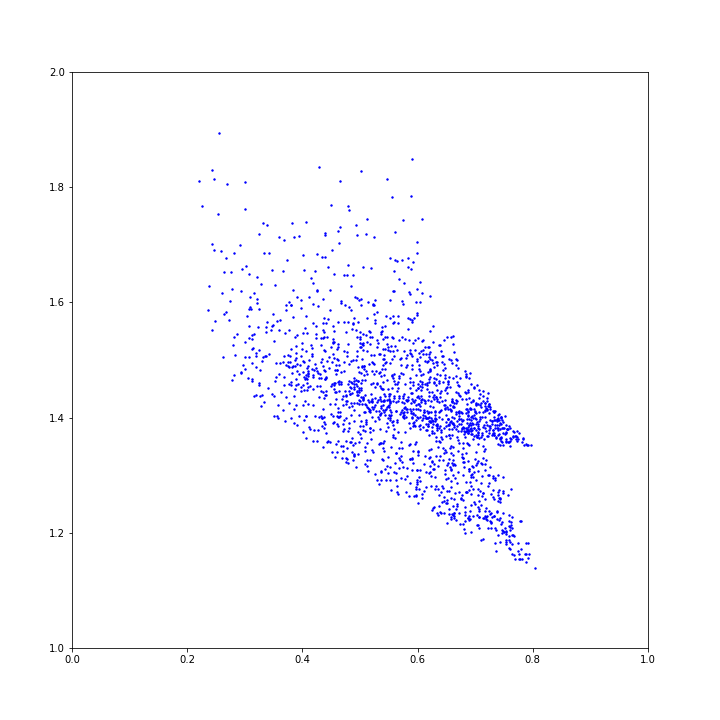

<b>We have thus with some accuracy reproduced a similar case to the analytic one above, where there is a limit $\sqrt{2}$ on the maximum relative evolution time for those states whose first minimum is close to 0

In the other case we have observed states whose first local minimum of fidelity is in $(0.35, 4)$ for states with evolution time $t < \pi$. We can observe the formation of distinct groups, and that the concurrence is bounded above. To explore this more let's do a similar procedure:

In [49]:
def Procedure2(H, batch_size=5000, batches=1, min_a=0.35, min_b=0.4):
    
    # Create figures
    fig_range=plt.figure(figsize=(5,5))
    fig_range2=plt.figure(figsize=(5,5))
    fig_range3=plt.figure(figsize=(5,5))
    
    # Set parameters for graph for range of fmins
    ax2=fig_range.add_axes([0.1, 0.1, 0.8, 0.8])
    ax2.set_xlim(0,1)
    ax2.set_ylim(1,2)
    
    ax3=fig_range2.add_axes([0.1, 0.1, 0.8, 0.8])
    ax3.set_xlim(0,1)
    ax3.set_ylim(1,2)
    
    ax4=fig_range3.add_axes([0.1, 0.1, 0.8, 0.8])
    ax4.set_xlim(0,1)
    ax4.set_ylim(1,2)
    
    # For reproducability
    np.random.seed(451)
    
    for i in range(batches):
        rho_batch=SampleStates(batch_size)
        C2=GetConcurrences(rho_batch)
        fmins, tmins, min_indices, timesteps=FindSampleMins(rho_batch, H)
        tlowers, bound1, bound2=GetTQSL(fmins, rho_batch, ret_bounds=True)
        taus=tmins/tlowers
        
        cond1=np.logical_and(np.logical_and(fmins > min_a, fmins < min_b), tmins != np.max(tmins))
        cond2=cond1
        range_idx=np.where(cond2)
        ax2.scatter(C2[range_idx], taus[range_idx],s=2,c='b')
        ax2.set_xlabel('$C$')
        ax2.set_ylabel(r'$\tau$')
        
        # Prune the slowest evolving states and observe behavior for fmin in (min_a,min_b)
        cond1=np.logical_and(np.logical_and(fmins > min_a, fmins < min_b), tmins != np.max(tmins))
        cond2=np.logical_and(cond1, tlowers==bound1)
        range_idx=np.where(cond2)
        ax3.scatter(C2[range_idx], taus[range_idx],s=2,c='b')
        ax3.set_xlabel('$C$')
        ax3.set_ylabel(r'$\tau$')
        
        cond1=np.logical_and(np.logical_and(fmins > min_a, fmins < min_b), tmins != np.max(tmins))
        cond2=np.logical_and(cond1, tlowers==bound2)
        range_idx=np.where(cond2)
        ax4.scatter(C2[range_idx], taus[range_idx],s=2,c='b')
        ax4.set_xlabel('$C$')
        ax4.set_ylabel(r'$\tau$')
        
    plt.show()
    return fig_range, fig_range2, fig_range3

<ipython-input-31-6bd16ac38c7a>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelities[:,idx]=GetFidelity(rho, rho_batch_0)


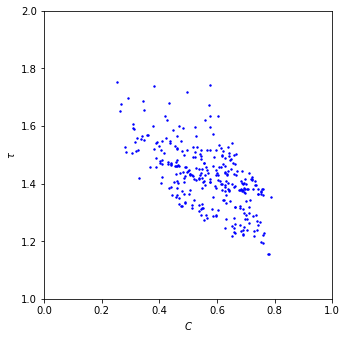

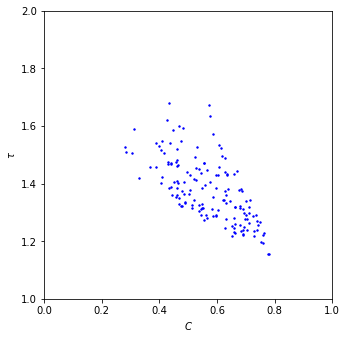

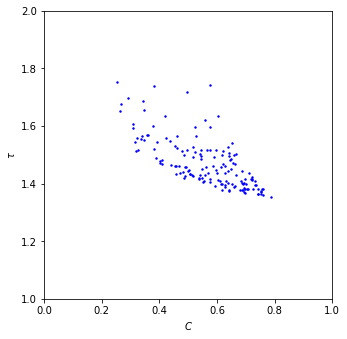

In [51]:
fr_1, fr_2, fr3=Procedure2(H, 5000,10)

In [53]:
fr_1.savefig('fr1.png')
fr_2.savefig('fr2.png')
fr3.savefig('fr3.png')

<b>The above procedure rendered the same set of data 3 times, once as normal and the other two based on which lower bound of $\tau_{QSL}$ was obtained. As can be seen, these states separate into two distinct groups based on whether the expectation or deviation of the energy is maximised.</b>

### Extensions

<b> In the above numerical survey we have considered only pure states. It is possible to extend this to mixed states. To sample a 2 qubit mixed state requires that in addition to sampling unitary $U$ as above, we sample an additional diagonal $\Sigma$ whose values $\sigma_i \sim U(0,1)$ with $\sum \sigma_i = 1$ 

Additionally the calculation of the fidelity requires modification. In general the fidelity of two density matrices is
    
$$F(\rho, \sigma)= {\rm tr}\left(\sqrt{\sqrt{\rho}\sigma\sqrt{\rho}}\right)^2$$
    
where $\sqrt{\rho}$ is set uniquely by the positive definiteness of $\rho$
</b>